# ASC speed into the binned heat transport grid

Code to bin the new ASC speed calculated in teh XY grid (cell faces), into the  binned locations of the HT, THe final objective here is to have the same points as the HT, for point-by-point correlation 

In [1]:
%matplotlib inline
# Standard modules
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import netCDF4 as nc
import seaborn as sns
import xarray as xr
import numpy as np
import os
from dask.distributed import Client
# Optional modules
import xgcm
# Ignore warnings
import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

In [2]:
client = Client(n_workers=112) # n_workers=4

In [3]:
#importing [Monthly] ASC speed from year 2095 to 2098
import glob
src = '/g/data/x77/wf4500/ASC_project/ASC_speed/monthly/OM2_RYF_XYgrid/Antarctic_slope_contour_1km_velocities_209'
gl =glob.glob(src + "****_uv.nc")
gl=sorted(gl); gl
print("%i netcdf data files"%len(gl))
##importing data from ocean.nc
Along_slope_v=xr.open_mfdataset(gl, concat_dim='time', combine='nested').mean('time')
Along_slope_v_time=xr.open_mfdataset(gl, concat_dim='time', combine='nested')

48 netcdf data files


### Binning speeds into the HT binned grid

In [4]:
# lon_along_contour=np.array(Along_slope_v_time.lon_along_contour.isel(time=0))
# lat_along_contour=np.array(Along_slope_v_time.lat_along_contour.isel(time=0))

Binning surface speed

In [5]:
# 	# convert to longitude coordinate and average into 3 degree longitude bins:
# 	# in degrees:
# 	bin_width = 3
# 	bin_spacing = 0.25
# 	lon_west = -280
# 	lon_east = 80
	
# 	surf_U=Along_slope_v_time.u_along_contour.isel(st_ocean=0,time=0)
	
# 	# new coordinate and midpoints of longitude bins:
# 	full_lon_coord = np.arange(lon_west,lon_east+bin_spacing,bin_spacing)
# 	lon_bin_midpoints = np.arange(lon_west+bin_width/2,lon_east-bin_width/2,bin_spacing)
# 	n_bin_edges = len(full_lon_coord)
	
# 	# sum into longitude bins:
# 	# need to be very careful of loops, we can't just mask over longitude values, but instead pick indices 
# 	# on the isobath contour and sum continously along contour between defined indices.
# 	# (i.e. lon_along_contour is not monotonic)
# 	# find points on contour to define edges of longitude bins:
# 	bin_edge_indices = np.zeros(n_bin_edges)
# 	for lon_bin in range(n_bin_edges-1):
# 	    # find first isobath point that has the right longitude:
# 	    first_point = np.where(lon_along_contour>=full_lon_coord[lon_bin])[0][0]
# 	    # then find all other isobath points with the same longitude as that first point:
# 	    same_lon_points = np.where(lon_along_contour==lon_along_contour[first_point])[0]
# 	    # we want the most southerly of these points on the same longitude line:
# 	    bin_edge_indices[lon_bin] = same_lon_points[np.argmin(lat_along_contour[same_lon_points])]
	    
# 	# define east/west edges:
# 	bin_edge_indices = bin_edge_indices.astype(int)
# 	bin_edge_indices_west = bin_edge_indices[:-int(bin_width/bin_spacing)-1]
# 	bin_edge_indices_east = bin_edge_indices[int(bin_width/bin_spacing):-1]
# 	n_bins = len(bin_edge_indices_west)
	
# 	# # sum heat transport from isobath coord into new longitude coord:
# 	# surf_U_binned = np.zeros(n_bins)
# 	# for lon_bin in range(n_bins):
# 	#     surf_U_this_bin = surf_U[bin_edge_indices_west[lon_bin]:bin_edge_indices_east[lon_bin]]
# 	#     surf_U_binned[lon_bin] = np.mean(surf_U_this_bin)
	    
# 	# find average latitude of each bin, so we can plot back on the isobath:
# 	lat_bin_midpoints = np.zeros(n_bins)
# 	for lon_bin in range(n_bins):
# 	    # find nearest isobath point:
# 	    lon_index = np.where(lon_along_contour>=lon_bin_midpoints[lon_bin])[0][0]
# 	    lat_bin_midpoints[lon_bin] = lat_along_contour[lon_index]

**Comment cell below if speed is already binned**

In [6]:
# from joblib import Parallel, delayed
# def binning_Ualong(Along_slope_v_time,lon_along_contour,lat_along_contour, nn):
# 	#nn will be ii*jj, just to make the paralelizarion more efficient    
# 	#defining ii and tt
# 	iilist=np.tile(np.arange(75),48)
# 	ttlist=np.sort(np.tile(np.arange(48),75))  
# 	# convert to longitude coordinate and average into 3 degree longitude bins:
# 	# in degrees:
# 	bin_width = 3
# 	bin_spacing = 0.25
# 	lon_west = -280
# 	lon_east = 80
	
# 	ii=iilist[nn];tt=ttlist[nn]
# 	surf_U=Along_slope_v_time.u_along_contour.isel(st_ocean=ii,time=tt)
	
# 	# new coordinate and midpoints of longitude bins:
# 	full_lon_coord = np.arange(lon_west,lon_east+bin_spacing,bin_spacing)
# 	lon_bin_midpoints = np.arange(lon_west+bin_width/2,lon_east-bin_width/2,bin_spacing)
# 	n_bin_edges = len(full_lon_coord)
	
# 	# sum into longitude bins:
# 	# need to be very careful of loops, we can't just mask over longitude values, but instead pick indices 
# 	# on the isobath contour and sum continously along contour between defined indices.
# 	# (i.e. lon_along_contour is not monotonic)
# 	# find points on contour to define edges of longitude bins:
# 	bin_edge_indices = np.zeros(n_bin_edges)
# 	for lon_bin in range(n_bin_edges-1):
# 	    # find first isobath point that has the right longitude:
# 	    first_point = np.where(lon_along_contour>=full_lon_coord[lon_bin])[0][0]
# 	    # then find all other isobath points with the same longitude as that first point:
# 	    same_lon_points = np.where(lon_along_contour==lon_along_contour[first_point])[0]
# 	    # we want the most southerly of these points on the same longitude line:
# 	    bin_edge_indices[lon_bin] = same_lon_points[np.argmin(lat_along_contour[same_lon_points])]
	    
# 	# define east/west edges:
# 	bin_edge_indices = bin_edge_indices.astype(int)
# 	bin_edge_indices_west = bin_edge_indices[:-int(bin_width/bin_spacing)-1]
# 	bin_edge_indices_east = bin_edge_indices[int(bin_width/bin_spacing):-1]
# 	n_bins = len(bin_edge_indices_west)
	
# 	# sum heat transport from isobath coord into new longitude coord:
# 	surf_U_binned = np.zeros(n_bins)
# 	for lon_bin in range(n_bins):
# 	    surf_U_this_bin = surf_U[bin_edge_indices_west[lon_bin]:bin_edge_indices_east[lon_bin]]
# 	    surf_U_binned[lon_bin] = np.mean(surf_U_this_bin)
	    
# 	# # find average latitude of each bin, so we can plot back on the isobath:
# 	# lat_bin_midpoints = np.zeros(n_bins)
# 	# for lon_bin in range(n_bins):
# 	#     # find nearest isobath point:
# 	#     lon_index = np.where(lon_along_contour>=lon_bin_midpoints[lon_bin])[0][0]
# 	#     lat_bin_midpoints[lon_bin] = lat_along_contour[lon_index]
	        
# 	return surf_U_binned



It would take 3 hours to run the binning for all depths in one timeframe if the binning is run in just one core. It would be almost impossible to do it for all times in the jupyter notebook. So we will run the loop in paralel to be faster.

In [7]:
# %%time
# surf_U_binned = Parallel(n_jobs=-1)(delayed(binning_Ualong)(Along_slope_v_time,lon_along_contour,lat_along_contour, nn) for nn in range(75*48))

In [8]:
# surf_U_binned_3d=np.reshape(surf_U_binned,[48,75,1428]);
# np.shape(surf_U_binned_3d)

Lets save the interpolated dataset

In [9]:
# distance_along_contour=np.array(Along_slope_v.distance_along_contour)
# st_ocean=np.array(Along_slope_v.st_ocean)
# timedim=np.array(Along_slope_v_time.time);

# ds = xr.Dataset(
# ...     data_vars=dict(
# ...         U_along_binned=([ "time","st_ocean","lon_bin_midpoints"], surf_U_binned_3d),
# ...         lat_bin_midpoints=([ "lon_bin_midpoints"], lat_bin_midpoints)
# ...     ),
# ...     coords=dict(
# ...         time=(["time"], timedim),
# ...         st_ocean=(["st_ocean"], st_ocean),
# ...         lon_bin_midpoints=([ "lon_bin_midpoints"], lon_bin_midpoints)
# ...     ),
# ...     attrs=dict(description="Weather related data. Time in months after year 2095"),
# ... )

In [10]:
# ds.to_netcdf('/home/156/wf4500/x77_wf4500/ASC_project/ASC_speed/monthly/OM2_RYF_XYgrid_binned/Antarctic_slope_u_1km_295to2098.nc')

**stop commenting here**

### Calculating water column integrated speed

In [11]:
ASC_ubinned = xr.open_dataset('/home/156/wf4500/x77_wf4500/ASC_project/ASC_speed/monthly/OM2_RYF_XYgrid_binned/Antarctic_slope_u_1km_295to2098.nc')

Getting coordinates

In [12]:
lon_bin_midpoints=np.array(ASC_ubinned.lon_bin_midpoints)
lat_bin_midpoints=np.array(ASC_ubinned.lat_bin_midpoints)

Getting cell volumes for vertical averages

In [13]:
session = cc.database.create_session()

experiment = '01deg_jra55v13_ryf9091_rerun_for_easterlies'
variable = 'time'
start_time='2095-01-01'
end_time='2098-12-31'

In [14]:
dzt = cc.querying.getvar(experiment, 'dzt', session, n=1).isel(time=0)
dzt_along_contour = dzt.sel(xt_ocean=ASC_ubinned.lon_bin_midpoints,yt_ocean=ASC_ubinned.lat_bin_midpoints,method='nearest')

tarea = cc.querying.getvar(experiment, 'tarea', session, n=1) #area_t
tarea = tarea.rename(nx='xt_ocean',ny='yt_ocean')
tarea['xt_ocean']=dzt.xt_ocean
tarea['yt_ocean']=dzt.yt_ocean
tarea_along_contour = tarea.sel(xt_ocean=ASC_ubinned.lon_bin_midpoints,yt_ocean=ASC_ubinned.lat_bin_midpoints,method='nearest')


(-80.0, -50.0)

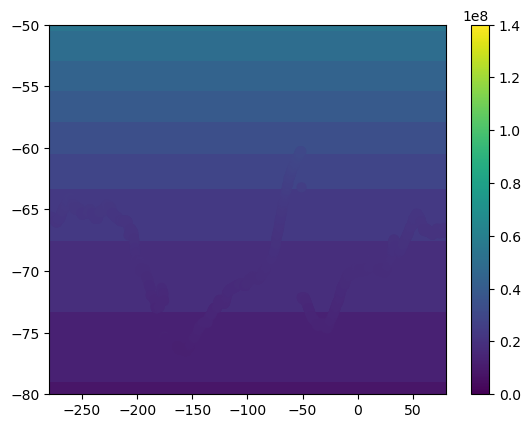

In [15]:
plt.contourf(tarea.xt_ocean,tarea.yt_ocean,tarea,np.arange(0,1.4e8,5e6));
plt.scatter(lon_bin_midpoints,lat_bin_midpoints,
            c=np.array(tarea_along_contour),vmin=0,vmax=1.4e8,s=40)
plt.colorbar()
plt.ylim(-80,-50)

The area for averaging seems resonably extracted

In [16]:
# First calculating the volume to use as a weight
vol_along_contour=tarea_along_contour*dzt_along_contour

**ASC_u(lon_along_contour,time)** will be the vertically averaged ASC along-slope speed (positive is clockwise circulation)

In [17]:
#first month is 
ASC_u = (ASC_ubinned.U_along_binned.isel(time=0)*vol_along_contour).sum(dim='st_ocean',skipna=True)/(vol_along_contour).sum(dim='st_ocean',skipna=True)
ASC_u
for n in np.arange(1,48):
    ASC_u0=ASC_ubinned.U_along_binned.isel(time=n)
    ASC_u1=(ASC_u0*vol_along_contour).sum(dim='st_ocean',skipna=True)/(vol_along_contour).sum(dim='st_ocean',skipna=True)
    ASC_u=xr.concat([ASC_u,ASC_u1],dim='time')

**ASC_u_circumpolar(time)** is ASC_u, with the velocities averaged along the contour

In [18]:
#first month is 
vol_along_contour0=vol_along_contour.isel(st_ocean=0)
ASC_u_circumpolar = (ASC_u.isel(time=0)*vol_along_contour0).sum(dim='lon_bin_midpoints',skipna=True)/(vol_along_contour0).sum(dim='lon_bin_midpoints',skipna=True)

for n in np.arange(1,48):
    ASC_u0=ASC_u.isel(time=n)
    ASC_u1=(ASC_u0*vol_along_contour0).sum(dim='lon_bin_midpoints',skipna=True)/(vol_along_contour0).sum(dim='lon_bin_midpoints',skipna=True)
    ASC_u_circumpolar=xr.concat([ASC_u_circumpolar,ASC_u1],dim='time')
    

In [37]:
ASC_u_circumpolar=np.array(ASC_u_circumpolar)
ASC_u_mean=np.array(ASC_u.mean(dim='time')) # mean along-slope vel in each contour point, averaged over time
ASC_u_std=np.array(ASC_u.std(dim='time')) # Standard deviation of along-slope vel  in each contour point, averaged over time

Test plot of along-slope velocities

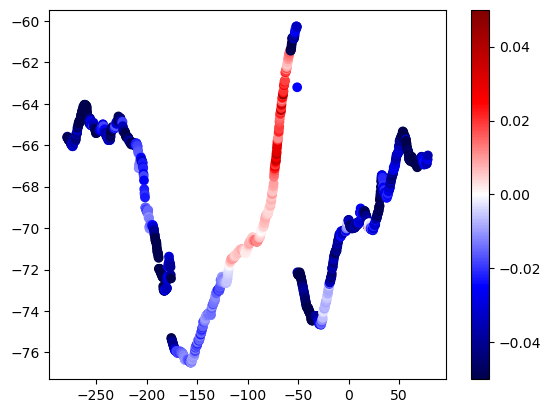

In [20]:
plt.scatter(lon_bin_midpoints,lat_bin_midpoints,c=ASC_u_mean,cmap='seismic',vmin=-.05,vmax=.05)
plt.colorbar()

### Importing binned heat transport

In [21]:
#importing Cross 1000m isobath heat transport
src = '/g/data/x77/wf4500/ASC_project/cross_slope_transport/Monthly/01deg_jra55v13_ryf9091/Ant_cross_slope_heat_terms_online_1000m_209'
gl =glob.glob(src + "****.nc")
gl=sorted(gl)
Heat_transp=xr.open_mfdataset(gl, concat_dim='time', combine='nested').mean('time')
Heat_transp_time=xr.open_mfdataset(gl, concat_dim='time', combine='nested')

In [22]:
#DO you wanna include zonal convergence in yout calculations? 'yes' or 'no'

include_ZC='yes'

if include_ZC=='yes':
    Heat_transp_time_mean=(Heat_transp_time.cross_slope_heat_trans.mean(dim='time') + Heat_transp_time.zonal_convergence.mean(dim='time'))*0.08
    Heat_transp_time_std=(Heat_transp_time.cross_slope_heat_trans.std(dim='time') + Heat_transp_time.zonal_convergence.std(dim='time'))*0.08
elif include_ZC=='no':
    Heat_transp_time_mean=(Heat_transp_time.cross_slope_heat_trans.mean(dim='time'))*0.08
    Heat_transp_time_std=(Heat_transp_time.cross_slope_heat_trans.std(dim='time'))*0.08


### Point by point correlations in space

In [23]:
#Filling the gap in ASCmean
import warnings
warnings.filterwarnings('ignore')
XX=np.argwhere(np.isnan(ASC_u_mean))
ASC_u_mean_filled=ASC_u_mean;
ASC_u_mean_filled[XX]=(ASC_u_mean_filled[XX+1]+ASC_u_mean_filled[XX-1])/2

ASC_u_std_filled=ASC_u_std;
ASC_u_std_filled[XX]=(ASC_u_std_filled[XX+1]+ASC_u_std_filled[XX-1])/2

In [24]:
Corr_meanU = np.corrcoef(ASC_u_mean_filled,Heat_transp_time_mean/1e12)
Corr_meanSPEED = np.corrcoef(np.abs(ASC_u_mean_filled),Heat_transp_time_mean/1e12)
Corr_std = np.corrcoef(ASC_u_std_filled,Heat_transp_time_std/1e12)

Corr_meanU[1,0],Corr_meanSPEED[1,0],Corr_std[1,0]

(0.07870667900073168, -0.08804180452480474, 0.2913643165427527)

In [25]:
figpath='/home/156/wf4500/x77_wf4500/ASC_project/analysis_figs/'

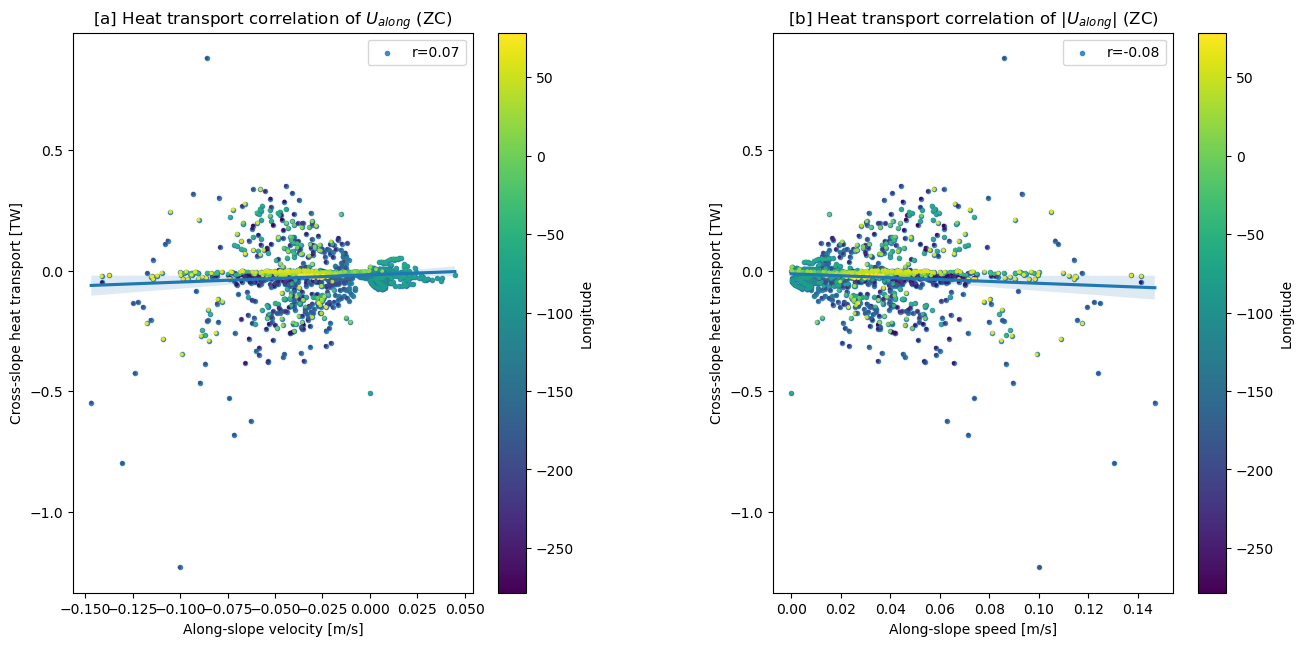

In [26]:
fig = plt.figure(figsize=(15,7))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


if include_ZC=='yes':
    flag='ZC'
elif include_ZC=='no':
    flag='noZC'

plt.subplot(1,2,1)
sns.regplot(x=ASC_u_mean_filled, y=Heat_transp_time_mean/1e12, marker='.',label=r"r=" + str(np.real(int(Corr_meanU[1,0]*100))/100))
plt.scatter(ASC_u_mean,Heat_transp_time_mean/1e12,c=lon_bin_midpoints,s=3)
plt.xlabel('Along-slope velocity [m/s]')
plt.ylabel('Cross-slope heat transport [TW]')
cbar0= plt.colorbar()
cbar0.set_label('Longitude', rotation=90)
plt.title(r"[a] Heat transport correlation of $U_{along}$ (" +flag+")")
plt.legend()

plt.subplot(1,2,2)
sns.regplot(x=np.abs(ASC_u_mean_filled), y=Heat_transp_time_mean/1e12, marker='.',label=r"r=" + str(np.real(int(Corr_meanSPEED[1,0]*100))/100))
plt.scatter(np.abs(ASC_u_mean),Heat_transp_time_mean/1e12,c=lon_bin_midpoints,s=3)
plt.xlabel('Along-slope speed [m/s]')
plt.ylabel('Cross-slope heat transport [TW]')
cbar1= plt.colorbar()
cbar1.set_label('Longitude', rotation=90)
plt.legend()
plt.title(r"[b] Heat transport correlation of $|U_{along}|$ (" +flag+")")

plt.savefig(figpath+'point_by_point_correlations_u'+flag+'.png',dpi=300)



On average we don't seem to have any significant correlation. But something interesting happens in this plot above that now has zonal convergence added. East of the Antarctic Peninsula, it seems that the the points are heavily following the curve. So lets make a new plot just using these points.

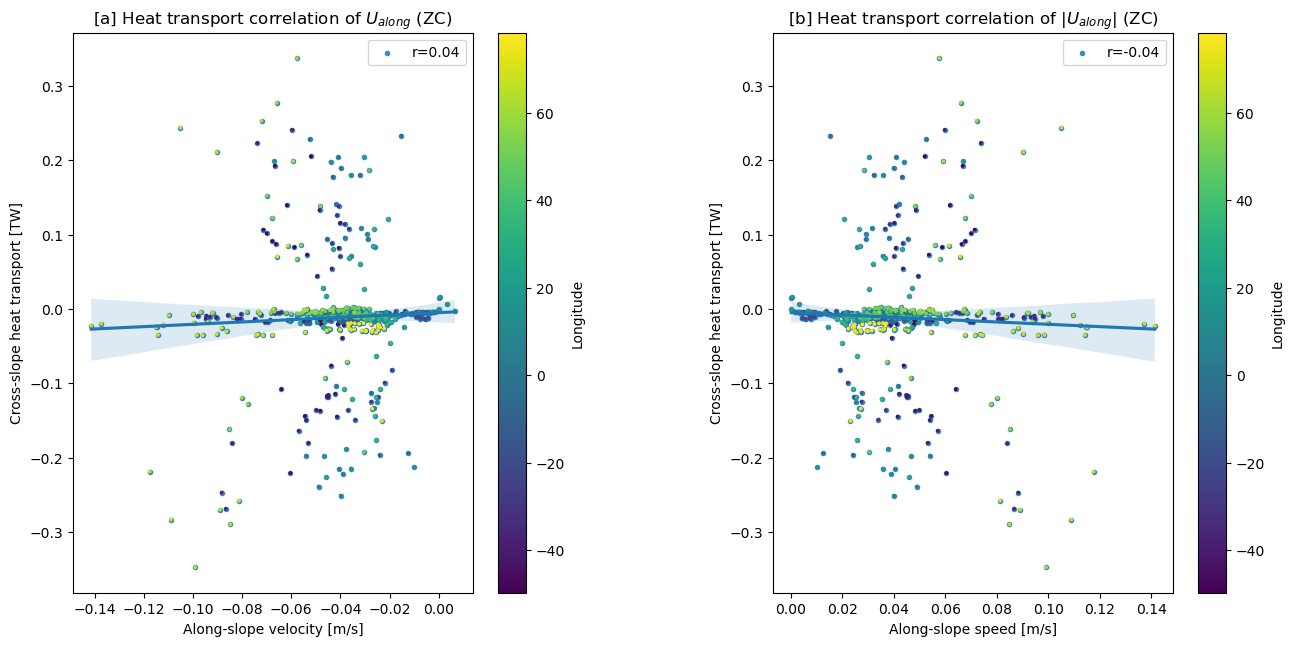

In [27]:
#creating the index list of  points with longitude >-50W
ind_50W=np.argwhere(lon_bin_midpoints>-50)[:,0]
# #Correlations
Corr50_meanU = np.corrcoef(ASC_u_mean_filled[ind_50W],Heat_transp_time_mean.isel(lon_bin_midpoints=ind_50W)/1e12)
Corr50_meanSPEED = np.corrcoef(np.abs(ASC_u_mean_filled[ind_50W]),Heat_transp_time_mean.isel(lon_bin_midpoints=ind_50W)/1e12)
Corr50_std = np.corrcoef(ASC_u_std_filled[ind_50W],Heat_transp_time_std.isel(lon_bin_midpoints=ind_50W)/1e12)

if include_ZC=='yes':
    flag='ZC'
elif include_ZC=='no':
    flag='noZC'



#Plotting the dispersion for locations east of teh Antarctic peninsula
fig = plt.figure(figsize=(15,7))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


plt.subplot(1,2,1)
sns.regplot(x=ASC_u_mean_filled[ind_50W], y=Heat_transp_time_mean.isel(lon_bin_midpoints=ind_50W)/1e12, marker='.',label=r"r=" + str(np.real(int(Corr50_meanU[1,0]*100))/100))
plt.scatter(ASC_u_mean[ind_50W],Heat_transp_time_mean.isel(lon_bin_midpoints=ind_50W)/1e12,c=lon_bin_midpoints[ind_50W],s=3)
plt.xlabel('Along-slope velocity [m/s]')
plt.ylabel('Cross-slope heat transport [TW]')
cbar0= plt.colorbar()
cbar0.set_label('Longitude', rotation=90)
plt.title(r"[a] Heat transport correlation of $U_{along}$ (" +flag+")")
plt.legend()

plt.subplot(1,2,2)
sns.regplot(x=np.abs(ASC_u_mean_filled[ind_50W]), y=Heat_transp_time_mean.isel(lon_bin_midpoints=ind_50W)/1e12, marker='.',label=r"r=" + str(np.real(int(Corr50_meanSPEED[1,0]*100))/100))
plt.scatter(np.abs(ASC_u_mean[ind_50W]),Heat_transp_time_mean.isel(lon_bin_midpoints=ind_50W)/1e12,c=lon_bin_midpoints[ind_50W],s=3)
plt.xlabel('Along-slope speed [m/s]')
plt.ylabel('Cross-slope heat transport [TW]')
cbar1= plt.colorbar()
cbar1.set_label('Longitude', rotation=90)
plt.legend()
plt.title(r"[b] Heat transport correlation of $|U_{along}|$ (" +flag+")")
plt.savefig(figpath+'point_by_point_correlations_u_50W'+flag+'.png',dpi=300)

WHen we do the correlation only with points east of 50W the signal still doesn't seem very coherent. how?

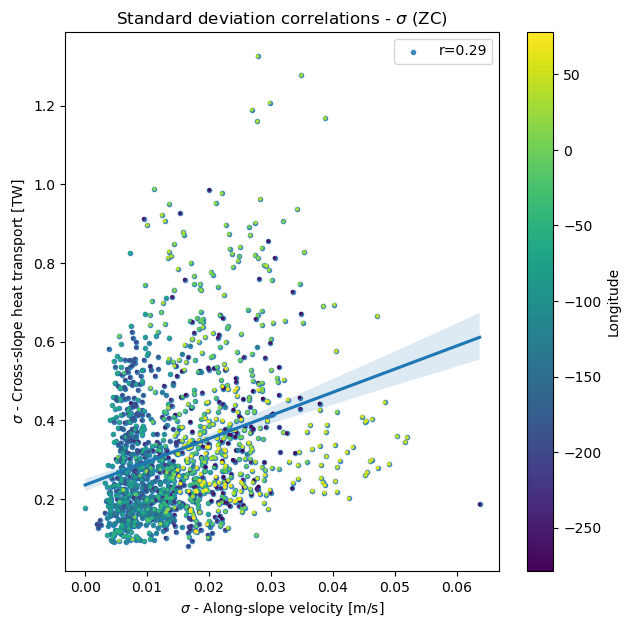

In [28]:
if include_ZC=='yes':
    flag='ZC'
elif include_ZC=='no':
    flag='noZC'


fig = plt.figure(figsize=(7,7))
sns.regplot(x=ASC_u_std_filled, y=Heat_transp_time_std/1e12,marker='.',label=r"r=" + str(np.real(int(Corr_std[1,0]*100))/100))
plt.scatter(ASC_u_std,Heat_transp_time_std/1e12,c=lon_bin_midpoints,s=3)
plt.xlabel(r"$\sigma$ - Along-slope velocity [m/s]")
plt.ylabel(r"$\sigma$ - Cross-slope heat transport [TW]")
plt.title(r"Standard deviation correlations - $\sigma$ (" +flag+")")
cbar2= plt.colorbar()
cbar2.set_label('Longitude', rotation=90)
plt.legend()
plt.savefig(figpath+'point_by_point_correlations_sd'+flag+'.png',dpi=300)

On important point of consideration should be taken here. The correlations hwew were done between the ASC speed and the binned Cross Slope Heat Transport. Here I did not include the zonal convergence, because that would make the final variable a sum of all heat fluxes into that shelf bin, instead of the cross slope heat transport itself. It would be interesting to test out how that would change when including the zonal binning. lets check it out.

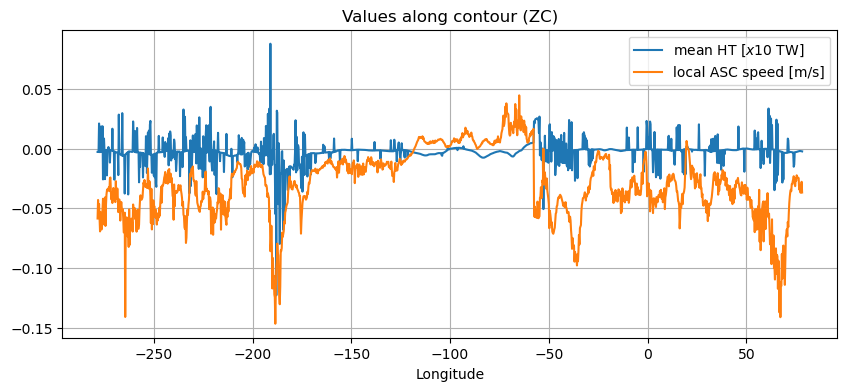

In [29]:
if include_ZC=='yes':
    flag='ZC'
elif include_ZC=='no':
    flag='noZC'
#contour plots
fig = plt.figure(figsize=(10,4))
plt.plot(lon_bin_midpoints,Heat_transp_time_mean/1e13,label=r"mean HT [$x10$ TW]")
plt.plot(lon_bin_midpoints,ASC_u_mean_filled,label='local ASC speed [m/s]')
plt.xlabel('Longitude')
plt.title("Values along contour (" +flag+")")
plt.legend()
plt.grid()

plt.savefig(figpath+'contour_ASC_HT_'+flag+'.png',dpi=300)

One thing we can do next is, correlate point by point in a different way. that is to first pick up the timeseries(HT and ASC) for each point of the contour. Then,do a temporal correlation between these. Finally, plot the tempora correlation as a function of the longitude. That might help us understand, which regions would have the highst correlations and might be more significant for the cross-slope-heat-transport

### Point by point correlations in time

In [30]:
#DO you wanna include zonal convergence in yout calculations? 'yes' or 'no'

include_ZC='yes'

if include_ZC=='yes':
    Heat_transp_time_points=(Heat_transp_time.cross_slope_heat_trans+ Heat_transp_time.zonal_convergence)*0.08
elif include_ZC=='no':
    Heat_transp_time_points=(Heat_transp_time.cross_slope_heat_trans)*0.08


Running the loop below in paralel for more efficiency

In [31]:
from joblib import Parallel, delayed
def correlation_loop(lon_bin_midpoints,Heat_transp_time_points,ASC_u, n):  
    Corr_p= np.corrcoef(ASC_u.isel(lon_bin_midpoints=n),Heat_transp_time_points.isel(lon_bin_midpoints=n)/1e12)
    Corr_p=Corr_p[1,0]
    return Corr_p 


In [35]:
%%time
import warnings
warnings.filterwarnings('ignore')
Corr_p = Parallel(n_jobs=-1)(delayed(correlation_loop)(lon_bin_midpoints,Heat_transp_time_points,ASC_u, n) for n in np.arange(np.size(lon_bin_midpoints)))


In [33]:
#For plotting the bathymetry
lat_slice  = slice(-83,-59)
ht_OM2 = cc.querying.getvar('01deg_jra55v13_ryf9091','ht' , session,n=1).sel(yt_ocean=lat_slice)
land_mask_OM2 = np.squeeze(ht_OM2.values)*0
land_mask_OM2[np.isnan(land_mask_OM2)] = 1
land_mask_OM2 = np.where(land_mask_OM2==1,land_mask_OM2,np.nan)
land_mask_masked_OM2 = np.ma.masked_where((land_mask_OM2==0),land_mask_OM2)
# make land go all the way to -90S:
land_mask_lat_OM2 = ht_OM2.yt_ocean.values
land_mask_lat_OM2[0] = -90

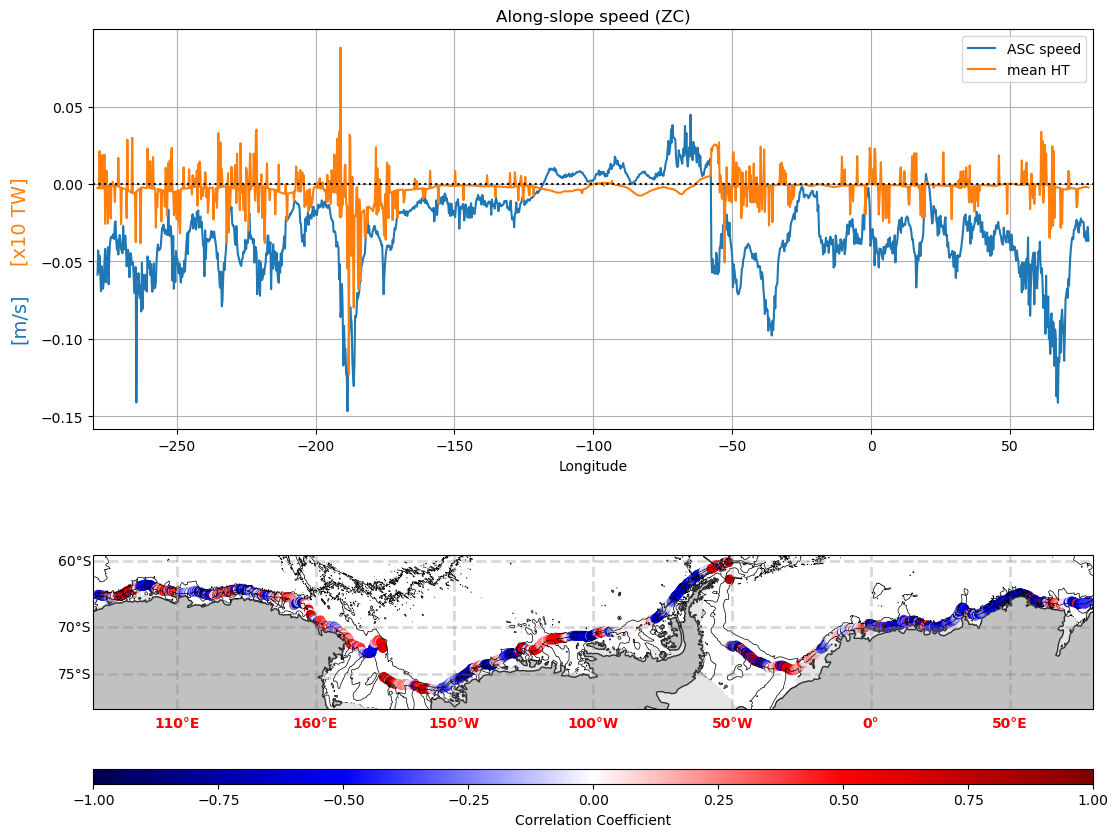

In [38]:
import cartopy.crs as ccrs
import cartopy.feature as cft
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker
from matplotlib import rc


if include_ZC=='yes':
    flag='ZC'
elif include_ZC=='no':
    flag='noZC'
#contour plots




plt.figure(figsize=(10, 8))

label_x=-310
#Plot 1
ax0 = plt.axes((0, 0.5, 1, 0.5))
ax0.plot(lon_bin_midpoints,ASC_u_mean_filled,label=r"ASC speed",color='tab:blue')
ax0.plot(lon_bin_midpoints,Heat_transp_time_mean/1e13,label=r"mean HT",color='tab:orange')
plt.plot([-280,80],[0,0],'k:'); plt.xlim(-280,80)
ax0.text(label_x, -0.1, r"[m/s]", color='tab:blue', rotation='vertical',fontsize=14)
ax0.text(label_x, -0.05, r"[x10 TW]", color='tab:orange', rotation='vertical',fontsize=14)


plt.xlabel('Longitude')
plt.xlim(-280,80)
plt.legend()
plt.title("Along-slope speed (" +flag+")")
plt.grid()



#Plot 2
projection = ccrs.Mercator(central_longitude=-100.0, min_latitude=-90.0, max_latitude=-50.0)
ax = plt.axes((0, 0, 1, 0.5),projection=projection)
land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
                                   edgecolor='black', facecolor='papayawhip', linewidth=0.5)


ax.set_extent([-280, 80, -59, -78], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')


plt.scatter(lon_bin_midpoints,lat_bin_midpoints,c=Corr_p,vmin=-1,vmax=1,cmap='seismic',transform=ccrs.PlateCarree())
plt.xlabel('Longitude');plt.ylabel('Latitude')
plt.grid();cbar=plt.colorbar(orientation="horizontal",aspect=70); 
cbar.set_label('Correlation Coefficient')
plt.contour(ht_OM2.xt_ocean,ht_OM2.yt_ocean,ht_OM2,levels=[500,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.contourf(ht_OM2.xt_ocean, land_mask_lat_OM2,land_mask_masked_OM2,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree(),alpha=0.3)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.3, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = True
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator([ -150, -100,-50,0,50,110,160])
gl.ylocator = mticker.FixedLocator([ -75,-70,-60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}


plt.savefig(figpath+'Correlations_contour_ASC_HT_'+flag+'.png',dpi=300)

# Correlations for Separate regions of the Shelf

#### EW:East Weddell Sea, [20W 50E]

We will calculate a correlation here first, since the point-by-point analysis in the plot above shows consistent negative correlation values along the region

In [39]:
EWslice=slice(-20,50);
up200m=slice(0,200)
low200m=slice(800,1000)
full1000m=slice(0,1000)

In [40]:
#first month is 

ASC_u_EW_up200 = (((ASC_ubinned.U_along_binned.isel(time=0).sel(lon_bin_midpoints=EWslice,st_ocean=up200m)) * (vol_along_contour.sel(lon_bin_midpoints=EWslice,st_ocean=up200m))).sum(dim='st_ocean',skipna=True) / ((vol_along_contour.sel(lon_bin_midpoints=EWslice,st_ocean=up200m)).sum(dim='st_ocean',skipna=True))).sum(dim='lon_bin_midpoints',skipna=True) 
#vol_along_contour0 needs to be calculated only once
vol_along_contour0=vol_along_contour.sel(lon_bin_midpoints=EWslice,st_ocean=up200m)
ASC_u_EW_up200 


for n in np.arange(1,48):
    ASC_u0=ASC_ubinned.U_along_binned.isel(time=n).sel(lon_bin_midpoints=EWslice,st_ocean=up200m)
    ASC_u1=(ASC_u0*vol_along_contour0).sum(dim='st_ocean',skipna=True)/(vol_along_contour0).sum(dim='st_ocean',skipna=True)
    ASC_u1=ASC_u1.sum(dim='lon_bin_midpoints',skipna=True) 
    ASC_u_EW_up200=xr.concat([ASC_u_EW_up200,ASC_u1],dim='time')





In [117]:
#first month is 

ASC_u_EW_full1000m = ((((ASC_ubinned.U_along_binned.isel(time=0).sel(lon_bin_midpoints=EWslice,st_ocean=full1000m)) * (vol_along_contour.sel(lon_bin_midpoints=EWslice,st_ocean=full1000m))).sum(dim='st_ocean',skipna=True) )  / ((vol_along_contour.sel(lon_bin_midpoints=EWslice,st_ocean=full1000m)).sum(dim='st_ocean',skipna=True))).mean(dim='lon_bin_midpoints',skipna=True)  
#vol_along_contour0 needs to be calculated only once
vol_along_contour0=vol_along_contour.sel(lon_bin_midpoints=EWslice,st_ocean=full1000m)
ASC_u_EW_full1000m 


for n in np.arange(1,48):
    ASC_u0=ASC_ubinned.U_along_binned.isel(time=n).sel(lon_bin_midpoints=EWslice,st_ocean=full1000m)
    ASC_u1=(ASC_u0*vol_along_contour0).sum(dim='st_ocean',skipna=True)/(vol_along_contour0).sum(dim='st_ocean',skipna=True)
    ASC_u1=ASC_u1.mean(dim='lon_bin_midpoints',skipna=True) 
    ASC_u_EW_full1000m=xr.concat([ASC_u_EW_full1000m,ASC_u1],dim='time')

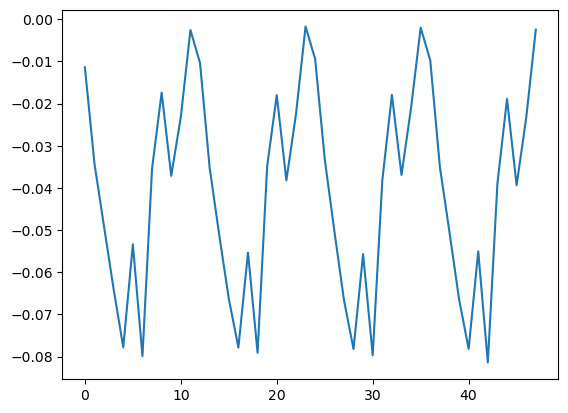

In [118]:
plt.plot(ASC_u_EW_full1000m)

In [42]:
Heat_transp2_time=(Heat_transp_time.cross_slope_heat_trans + Heat_transp.zonal_convergence)*0.08

In [131]:
vol_along_contour1=vol_along_contour.isel(st_ocean=0)

<xarray.DataArray (time: 48, lon_bin_midpoints: 1428)>
dask.array<mul, shape=(48, 1428), dtype=float64, chunksize=(1, 1428), chunktype=numpy.ndarray>
Coordinates:
  * lon_bin_midpoints  (lon_bin_midpoints) float64 -278.5 -278.2 ... 78.0 78.25
Dimensions without coordinates: time

In [44]:
#first month is 

HT_EW_full1000m = (((Heat_transp2_time.isel(time=0).sel(lon_bin_midpoints=EWslice)) * (vol_along_contour1.sel(lon_bin_midpoints=EWslice))) / ((vol_along_contour1.sel(lon_bin_midpoints=EWslice)))).sum(dim='lon_bin_midpoints',skipna=True) 
#vol_along_contour0 needs to be calculated only once
vol_along_contour0=vol_along_contour1.sel(lon_bin_midpoints=EWslice)
HT_EW_full1000m


for n in np.arange(1,48):
    ASC_u0=Heat_transp2_time.isel(time=n).sel(lon_bin_midpoints=EWslice)
    ASC_u1=(ASC_u0*vol_along_contour1)/(vol_along_contour1)
    ASC_u1=ASC_u1.sum(dim='lon_bin_midpoints',skipna=True) 
    HT_EW_full1000m=xr.concat([HT_EW_full1000m,ASC_u1],dim='time')



In [119]:
ASC_u_EW_full1000m=np.array(ASC_u_EW_full1000m);
HT_EW_full1000m=np.array(HT_EW_full1000m)

In [120]:
Corr_EW = np.corrcoef(ASC_u_EW_full1000m,HT_EW_full1000m/1e12)
Corr_EW[1,0]

-0.8200917478674506

Text(0, 0.5, 'Cross-slope HT (neg = South)')

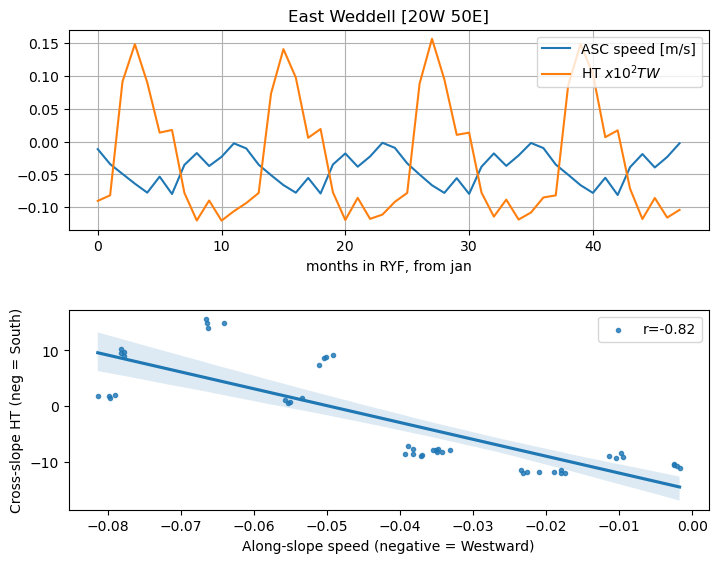

In [136]:
fig = plt.figure(figsize=(8,6))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


plt.subplot(2,1,1)
plt.plot(ASC_u_EW_full1000m,label=r'ASC speed [m/s]')
plt.plot(HT_EW_full1000m/1e14,label=r'HT $x10^{2} TW$')
plt.grid(); 
plt.legend()
plt.title('East Weddell [20W 50E]')
plt.xlabel('months in RYF, from jan')

plt.subplot(2,1,2)


sns.regplot(x=ASC_u_EW_full1000m, y=HT_EW_full1000m/1e12,marker='.',label=r"r=" + str(np.real(int(Corr_EW[1,0]*100))/100))
plt.legend()
plt.xlabel('Along-slope speed (negative = Westward)')
plt.ylabel(r'Cross-slope HT (neg = South)')

East Weddell Sea is surface-intensified ASC

For future analysis: Separate into density layers, Use daily output, filter seasonal cycle (Ekman transport is dominating the heat transport here?)